In [568]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [569]:
df = pd.read_csv("C:\Data\Hotel Project\hotel_bookings.csv")

In [570]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [572]:
df.shape

(119390, 32)

In [573]:
df1 = df

In [574]:
df1[df1.duplicated()].shape

(31994, 32)

In [575]:
df1.drop_duplicates(inplace = True)

In [576]:
df1.shape

(87396, 32)

In [577]:
df1.isnull().sum().sort_values(ascending = False).head()

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [578]:
df1['company'].fillna(0, inplace = True)

In [579]:
df1.isnull().sum().sort_values(ascending = False).head()

agent                 12193
country                 452
children                  4
hotel                     0
reserved_room_type        0
dtype: int64

In [580]:
df1['agent'].fillna(0, inplace = True)

In [581]:
df1['country'].fillna('None', inplace = True)

In [582]:
df1['children'].fillna(0, inplace = True)

In [583]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [584]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [585]:
df1.company.value_counts()

company
0.0      82137
40.0       851
223.0      503
45.0       238
153.0      206
         ...  
96.0         1
76.0         1
184.0        1
54.0         1
402.0        1
Name: count, Length: 353, dtype: int64

In [586]:
df1[['children','agent','company']] = df1[['children','agent','company']].astype('int64')

In [587]:
df1.reservation_status_date.value_counts()

reservation_status_date
2016-02-14    211
2017-05-25    205
2015-10-21    199
2016-10-06    196
2016-03-28    196
             ... 
2015-02-27      1
2015-03-11      1
2015-03-12      1
2015-03-18      1
2015-02-02      1
Name: count, Length: 926, dtype: int64

In [588]:
df1['reservation_status_date'] = df1['reservation_status_date'].str.replace('-', '/')

In [589]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

In [590]:
df1['reservation_status_date'].dtypes

dtype('<M8[ns]')

In [591]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

In [592]:
df1["total_stay"] = (df1.stays_in_weekend_nights + df1.stays_in_week_nights)

In [593]:
df1['total_people'] = (df1.adults + df1.babies + df1.children)

In [594]:
df_stay = df[(df1.is_canceled == 0) & (df1.total_stay < 15)]

<Axes: xlabel='total_stay', ylabel='count'>

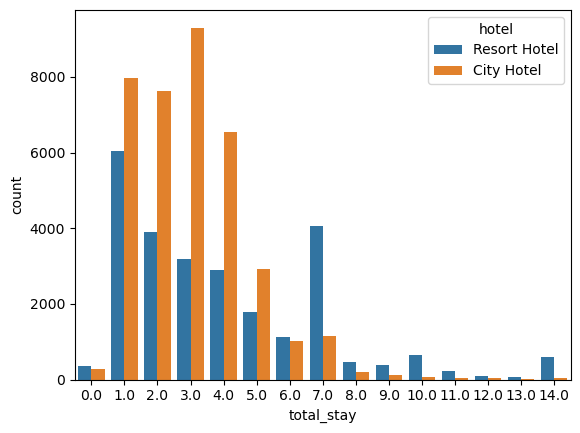

In [595]:
sns.countplot(x = df_stay.total_stay, hue = df.hotel)

In [596]:
df_canceled = df1[df1.is_canceled == 1].groupby("hotel").count().is_canceled

In [597]:
df_canceled

hotel
City Hotel      16049
Resort Hotel     7976
Name: is_canceled, dtype: int64

In [598]:
canrate = df_canceled / df1.groupby('hotel').count().is_canceled * 100

In [599]:
canrate

hotel
City Hotel      30.038557
Resort Hotel    23.480923
Name: is_canceled, dtype: float64

<Axes: xlabel='hotel', ylabel='is_canceled'>

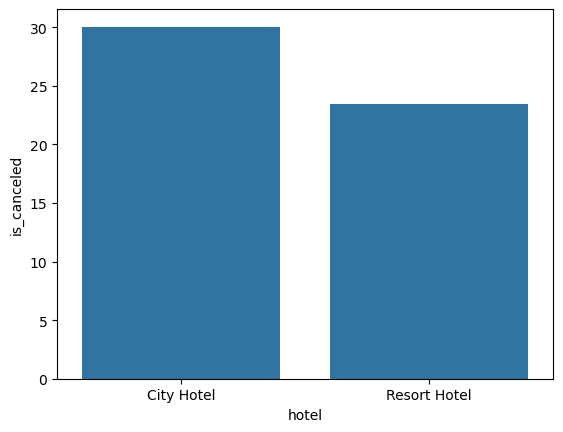

In [600]:
sns.barplot(x = canrate.index, y = canrate)

In [601]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


In [602]:
repeat = df1[df1.is_repeated_guest == 1].groupby('hotel').count().is_repeated_guest

In [603]:
repeat

hotel
City Hotel      1708
Resort Hotel    1707
Name: is_repeated_guest, dtype: int64

In [604]:
repperc = repeat/ df1.groupby('hotel').count().is_repeated_guest 

<Axes: xlabel='hotel', ylabel='is_repeated_guest'>

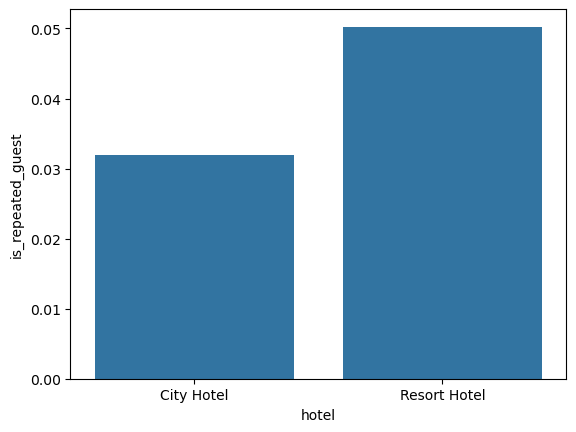

In [605]:
sns.barplot(x = repperc.index, y = repperc)

In [606]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'total_people'],
      dtype='object')

In [607]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


In [608]:
rate = df1.groupby(['distribution_channel','hotel'])["adr"].sum()

In [609]:
ratedf = rate.reset_index()

In [610]:
ratedf

,distribution_channel,hotel,adr
0,Corporate,City Hotel,217074.16
1,Corporate,Resort Hotel,131054.02
2,Direct,City Hotel,682305.50
3,Direct,Resort Hotel,735121.75
4,GDS,City Hotel,21777.53
5,TA/TO,City Hotel,5008481.34
6,TA/TO,Resort Hotel,2497404.49
7,Undefined,City Hotel,118.50
8,Undefined,Resort Hotel,112.70


<Axes: xlabel='distribution_channel', ylabel='adr'>

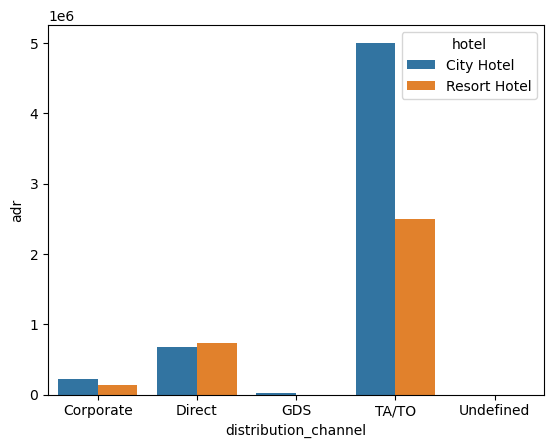

In [611]:
sns.barplot(x = ratedf.distribution_channel	, y = ratedf.adr, hue = ratedf.hotel)

In [612]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'total_people'],
      dtype='object')

In [613]:
canceled_df = df1[df1.days_in_waiting_list > 0].groupby('days_in_waiting_list')['is_canceled'].count().reset_index()

In [614]:
canceled_df

,days_in_waiting_list,is_canceled
0,1,12
1,2,5
2,3,2
3,4,15
4,5,8
...,...,...
122,236,7
123,259,9
124,330,4
125,379,3


<Axes: xlabel='days_in_waiting_list', ylabel='Density'>

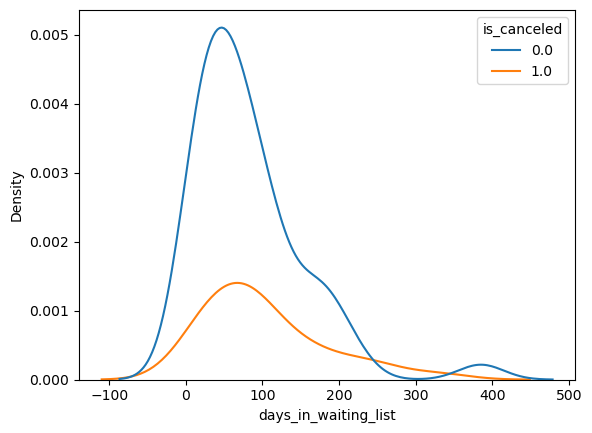

In [615]:
sns.kdeplot(x = canceled_df.days_in_waiting_list, data = canceled_df, hue = df1.is_canceled)

In [616]:
df1['not_same_room'] = (df1['reserved_room_type'] != df1['assigned_room_type'])

In [617]:
canc = df1[df1.is_canceled > 0 ].groupby('not_same_room')['is_canceled'].count().reset_index()

In [618]:
canc.is_canceled / canc.is_canceled.sum() * 100

0    97.431842
1     2.568158
Name: is_canceled, dtype: float64

In [619]:
df1.groupby('not_same_room')['adr'].mean()

not_same_room
False    110.253521
True      84.144225
Name: adr, dtype: float64

In [620]:
canceled = df1[df1.is_canceled ==1]

<Axes: xlabel='not_same_room', ylabel='adr'>

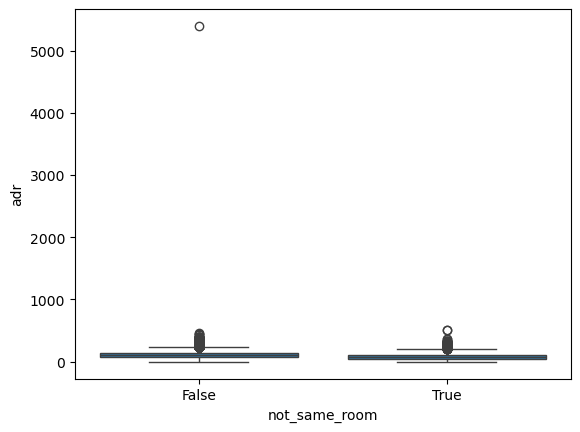

In [621]:
sns.boxplot(x = 'not_same_room', y = 'adr', data = df1)

# We got an improper chart because of extreme values so eliminate it

In [622]:
df1 = df1[df1.adr < 1000]

<Axes: xlabel='not_same_room', ylabel='adr'>

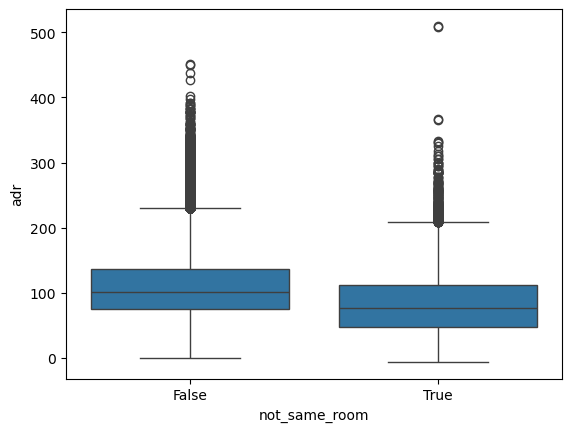

In [623]:
sns.boxplot(x = 'not_same_room', y = 'adr', data = df1)

# Which type of customer mostly do the bookings

In [635]:
customer = df1[df1.is_canceled == 0 ].groupby('customer_type')['arrival_date_day_of_month'].count()

<Axes: xlabel='customer_type', ylabel='arrival_date_day_of_month'>

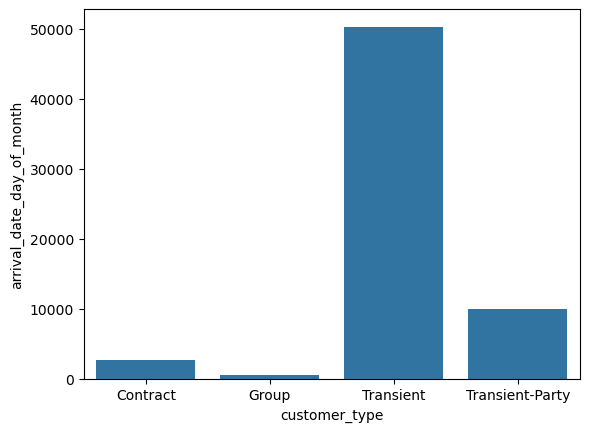

In [636]:
sns.barplot(x = customer.index, y = customer)